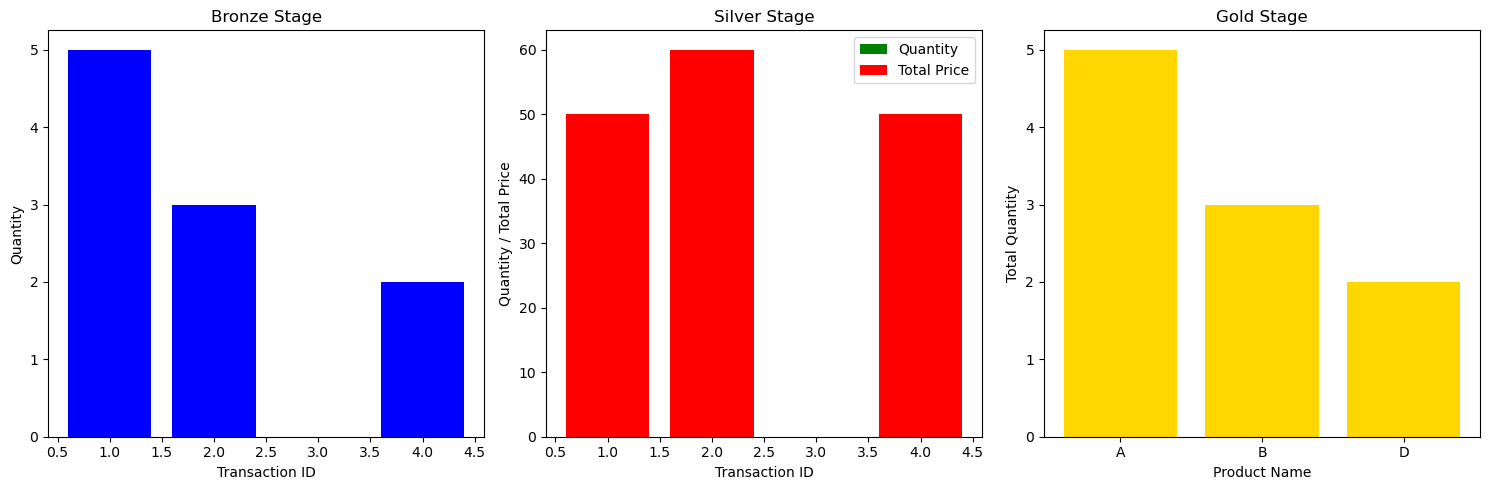

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Simulated raw data in CSV format
raw_data = pd.DataFrame({
    'transaction_id': [1, 2, 3, 4],
    'product_name': ['A', 'B', 'C', 'D'],
    'quantity': [5, 3, None, 2],  # Simulate missing data
    'unit_price': [10.0, 20.0, 15.0, 25.0]
})

# Define bronze stage processing (simple loading)
def bronze_stage(data):
    # For simplicity, bronze stage just loads the raw data
    return data

# Define silver stage processing (cleaning and basic transformations)
def silver_stage(data):
    # Clean missing values
    data.dropna(inplace=True)
    # Add a new column for total price
    data['total_price'] = data['quantity'] * data['unit_price']
    return data

# Define gold stage processing (advanced transformations)
def gold_stage(data):
    # Group data by product and calculate total quantity and revenue
    gold_data = data.groupby('product_name').agg({
        'quantity': 'sum',
        'total_price': 'sum'
    }).reset_index()
    return gold_data

# Simulate processing stages
bronze_data = bronze_stage(raw_data.copy())
silver_data = silver_stage(bronze_data.copy())
gold_data = gold_stage(silver_data.copy())

# Visualization
plt.figure(figsize=(15, 5))

# Bronze Stage Visualization
plt.subplot(1, 3, 1)
plt.bar(bronze_data['transaction_id'], bronze_data['quantity'], color='b')
plt.title('Bronze Stage')
plt.xlabel('Transaction ID')
plt.ylabel('Quantity')

# Silver Stage Visualization
plt.subplot(1, 3, 2)
plt.bar(silver_data['transaction_id'], silver_data['quantity'], color='g', label='Quantity')
plt.bar(silver_data['transaction_id'], silver_data['total_price'], color='r', label='Total Price')
plt.title('Silver Stage')
plt.xlabel('Transaction ID')
plt.ylabel('Quantity / Total Price')
plt.legend()

# Gold Stage Visualization
plt.subplot(1, 3, 3)
plt.bar(gold_data['product_name'], gold_data['quantity'], color='gold')
plt.title('Gold Stage')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity')

plt.tight_layout()
plt.show()
